# K-Means 

## 1. K-means 聚类

在这部分，实现K-means算法，并应用到图片压缩中。

首先，你会在一个二维数据集开始实验，以获得一些直观的工作原理。
之后，你会将K-means算法应用到图片压缩上，减少图片的颜色，仅保留那些图片上最常见的颜色。

### 1.1 实现K-means算法
K-means是一个迭代的，无监督的聚类算法，将类似的实例组合成簇。 该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。 

#### 1.1.1 寻找最近的中心点
要实现的第一部分是找到数据中每个实例最接近的聚类中心的函数。
对于给定的所有中心点，K-means算法把每个样本$x^{(i)}$分配给离它最近的中心点。
公式如下：

$$c^{(i)} = j \text{ that miminizes } ||x^{(i)} - \mu_j||^2$$

其中$c^{(i)}$ 是距离 $x^{(i)}$ 最近的中心点的索引， $\mu_j$是第$j$个中心点的位置（值）。

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

In [38]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m,dtype=int)
    for i in range(m):
        min_dist = 1000000000
        for j in range(k):
            res =  np.sum( np.power( X[i,:] - centroids[j,:] , 2 )  )
            if res <= min_dist:
                min_dist = res
                idx[i] = j  
    return idx

- 数学公式：找到最小化 $||x^{(i)} - \mu_j||^2$ 的 $j$。
- 代码解读：
   - 遍历每个样本点。
   - 计算该点到所有中心点的距离。
   - 记录最小距离对应的中心点索引（idx）。

让我们来测试这个函数，以确保它的工作正常。 我们将使用练习中提供的测试用例。

In [39]:
data = sio.loadmat('D:\\机器学习\\聚类算法\\K均值聚类\\ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)

 # 5.65858312  4.79996405
idx[0:3]
# 如果代码没问题，预期的输出为[0., 2., 1.]

array([0, 2, 1])

#### 1.1.2 计算聚类中心的值

接下来，我们需要一个函数来计算簇的聚类中心。 聚类中心只是当前分配给簇的所有样本的平均值。计算公式为：
$$\mu_k = \frac{1}{|C_k|}\sum_{i \in C_k} x^{(i)}$$

其中$C_k$是所有属于第$k$个聚类中心的点的集合。
例如，$x^{(3)}$ 和 $x^{(5)}$ 被分配给$k=2$的聚类中心，那么 $\mu_2 = \dfrac{1}{2}(x^{(3)} + x^{(5)})$。

下面先加载数据，绘制出来看看：

In [40]:
data2 = pd.DataFrame(data['X'], columns=['X1', 'X2'])

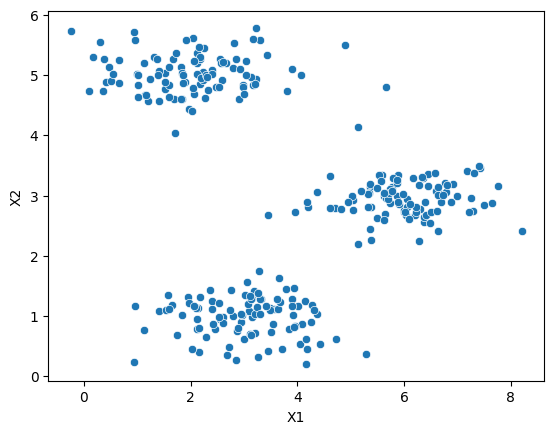

In [41]:
sns.scatterplot(x = data2['X1'], y = data2['X2'])
plt.show()

计算中心点的函数：

In [42]:
def compute_centroids(X, idx, k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    cnt = np.zeros(k)
    for i in range(len(idx)):
        centroids[idx[i]] = centroids[idx[i]] + X[i,:] 
        cnt[idx[i]] = cnt[idx[i]] + 1
    for i in range(k):
        if cnt[i] != 0:
            centroids[i] = centroids[i] / cnt[i]
    return centroids

In [43]:
centroids=compute_centroids(X, idx, 3)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


此输出也符合练习中的预期值。

### 1.2 应用K-means到数据集上
这部分涉及实际运行该算法的一些迭代次数和可视化结果。 
为了运行算法，我们只需要在将样本分配给最近的簇并重新计算簇的聚类中心。

In [44]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m,dtype = int)
    centroids = initial_centroids
    
    centroids_iters = []
    centroids_iters.append(centroids)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        centroids_iters.append(centroids)
    
    return idx, np.array(centroids_iters)

In [45]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx, centroids_iters = run_k_means(X, initial_centroids, 10)

绘制出中心点的的变化过程：

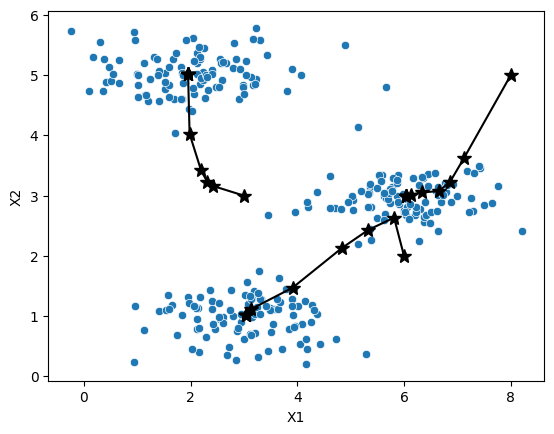

In [46]:
centroids_iters
_,K,_ = centroids_iters.shape
for i in range(K):
    plt.plot(centroids_iters[:,i,0],centroids_iters[:,i,1],color='black', marker='*', markersize=10,linewidth=1.5)
sns.scatterplot(x = data2['X1'], y = data2['X2'])
plt.show()

### 1.3 随机初始化

我们跳过的一个步骤是初始化聚类中心的过程。 这可以影响算法的收敛。 我们的任务是创建一个选择随机样本并将其用作初始聚类中心的函数。

In [47]:
def init_centroids(X, k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    idx = np.random.choice(m,k,replace=False)
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    return centroids

In [48]:
init_centroids(X, 3)

array([[2.09517296, 1.14010491],
       [7.30278708, 3.38015979],
       [2.23454135, 5.05547168]])

### 1.4 用K-means压缩图像

下一个任务是将K-means应用于图像压缩。 从下面的演示可以看到，我们可以使用聚类来找到最具代表性的少数颜色，并使用聚类分配将原始的24位颜色映射到较低维的颜色空间。 

下面是我们要压缩的图像。

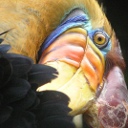

In [49]:
from IPython.display import Image
Image(filename='D:\\机器学习\\聚类算法\\K均值聚类\\bird_small.png', width=300)

原始像素数据已经准备好了，让我们加载进来吧：

In [50]:
image_data = sio.loadmat('D:\\机器学习\\聚类算法\\K均值聚类\\bird_small.mat')
type(image_data)

dict

In [51]:
A = image_data['A']
A.shape

(128, 128, 3)

现在我们需要对数据应用一些预处理，并将其提供给K-means算法。

In [52]:
# 数据归一化
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [53]:
# 随机初始化聚类中心
initial_centroids = init_centroids(X, 16)

# 执行K-means算法
idx, centroids_iter = run_k_means(X, initial_centroids, 10)
centroids = centroids_iter[-1]

# 获取最近的聚类中心
idx = find_closest_centroids(X, centroids)

# 把每个像素映射到聚类中心
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [54]:
# reshape 成原始维度
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

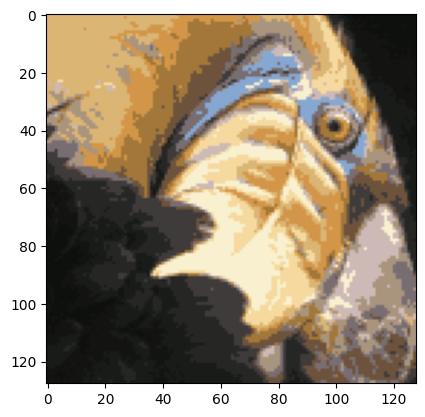

In [55]:
plt.imshow(X_recovered)
plt.show()

可以看到我们对图像进行了压缩，但图像的主要特征仍然存在。 这就是K-means。 